# Introduction

Notebook to aggregate the running of models in the context of traceability between **features** and **bug reports**.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

from modules.models_runner import feat_br_strat_runner
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd

import warnings; warnings.simplefilter('ignore')

features = fd.Datasets.read_features_df()
bugreports = fd.Datasets.read_selected_bugreports_df()

MODELS = ['lsi','lda','bm25','wordvector','cust_wordvector']

Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)


# Run All Models

## Intersec Strategy

In [2]:
exp_vol_intersec_strat_runner = feat_br_strat_runner.Feat_BR_Exp_Vol_Intersec_Strat_Runner()
exp_vol_intersec_strat_runner.execute()

evaluator_2 = exp_vol_intersec_strat_runner.get_evaluator() 
evals_df_2 = exp_vol_intersec_strat_runner.get_evals_df()

Expert and Volunteers Matrix INTERSEC.shape: (91, 19)
Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)
Running LSI model -----
Running LDA model -----
Running BM25 model -----
Running Customized W2V model -----
Running W2V model -----
Running ZeroR model -----
Expert and Volunteers Matrix INTERSEC.shape: (91, 19)
major_target_artifact: ['new_awesome_bar']
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 
Evaluating CUST_WORDVECTOR Model ----- 
Evaluating ZERO_R Model ----- 


### Results

In [3]:
evals_df_2.head()

model          ref_name  perc_precision  perc_recall  perc_fscore  \
0   lsi  top_1_cosine_0.0           26.37        70.59        52.86   
1   lsi  top_1_cosine_0.1           26.37        70.59        52.86   
2   lsi  top_1_cosine_0.2           26.37        70.59        52.86   
3   lsi  top_1_cosine_0.3           26.37        70.59        52.86   
4   lsi  top_1_cosine_0.4           26.37        70.59        52.86   

   sim_threshold  top                                     trace_links_df  
0            0.0  1.0  Bug_Number               1248267  1248268  125...  
1            0.1  1.0  Bug_Number               1248267  1248268  125...  
2            0.2  1.0  Bug_Number               1248267  1248268  125...  
3            0.3  1.0  Bug_Number               1248267  1248268  125...  
4            0.4  1.0  Bug_Number               1248267  1248268  125...

In [4]:
evals_df_2_1 = evals_df_2[evals_df_2.top != 19.0]
aux_functions.highlight_df( evals_df_2_1[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

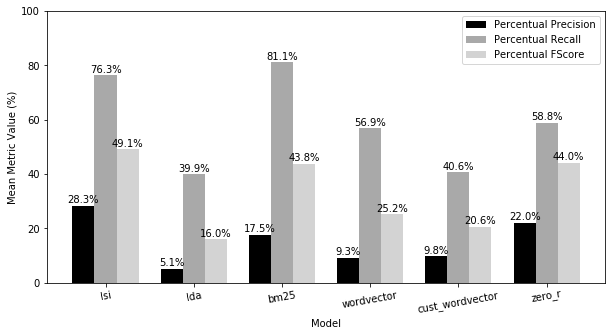

In [5]:
import matplotlib.pyplot as plt
import numpy as np

title = ''
results = evals_df_2_1
        
start_pos, width = 0.25, 0.25

num_unique_models = len(results.model.unique())
pos_1 = list([start_pos+i         for i in range(num_unique_models)])  # precisions
pos_2 = list([start_pos+j+width   for j in range(num_unique_models)])  # recalls
pos_3 = list([start_pos+k+2*width for k in range(num_unique_models)])  # fscores      

positions = [pos_1, pos_2, pos_3]

f, ax = plt.subplots(1,1, figsize=(10,5))
f.suptitle(title)

model_names = [m.lower() for m in results.model.unique()]

legends = ['Percentual Precision','Percentual Recall','Percentual FScore']

heights_1 = [np.mean(results[results.model == m.lower()]['perc_precision'].values) for m in model_names]
heights_2 = [np.mean(results[results.model == m.lower()]['perc_recall'].values) for m in model_names]
heights_3 = [np.mean(results[results.model == m.lower()]['perc_fscore'].values) for m in model_names]

labels = [[(pos_1[i], heights_1[i] + .3, str(round(heights_1[i],1)) + '%') for i in range(num_unique_models)],
          [(pos_2[i], heights_2[i] + .3, str(round(heights_2[i],1)) + '%') for i in range(num_unique_models)],
          [(pos_3[i], heights_3[i] + .3, str(round(heights_3[i],1)) + '%') for i in range(num_unique_models)]]

ax.bar(pos_1, width=width, height=heights_1, color='black')
ax.bar(pos_2, width=width, height=heights_2, color='darkgray')
ax.bar(pos_3, width=width, height=heights_3, color='lightgray')

for l in labels:
    for x,y,label in l:
        ax.text(x=x, y=y, s=label, ha='center', va='bottom', color='black')

ax.set(xlabel='Model', ylabel='Mean Metric Value (%)')
ax.set_xticks([x + 0.5 for x in range(num_unique_models)])
ax.set_xticklabels(model_names, rotation=10)
ax.set_ylim([0,100])
ax.legend(legends, loc='upper right')

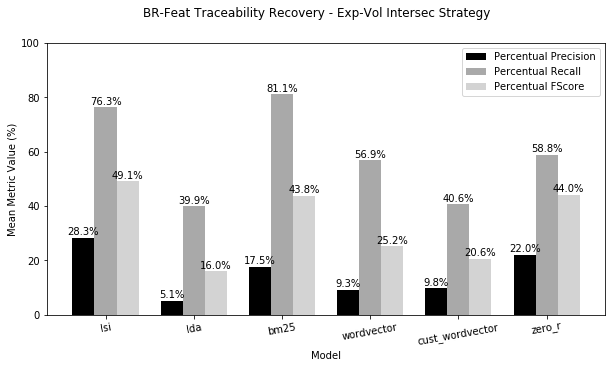

In [6]:
evaluator_2.plot_evaluations_3(evals_df_2_1, title='BR-Feat Traceability Recovery - Exp-Vol Intersec Strategy')

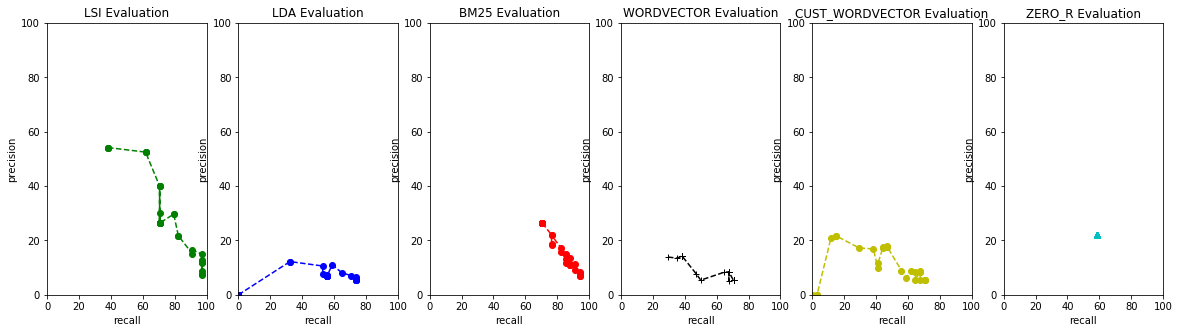

In [7]:
evaluator_2.plot_evaluations_4(evals_df_2_1)

In [8]:
## evaluator_2.plot_evaluations_5(evals_df_2_1)

**Similarity Threshold Variation Analysis**

LSI

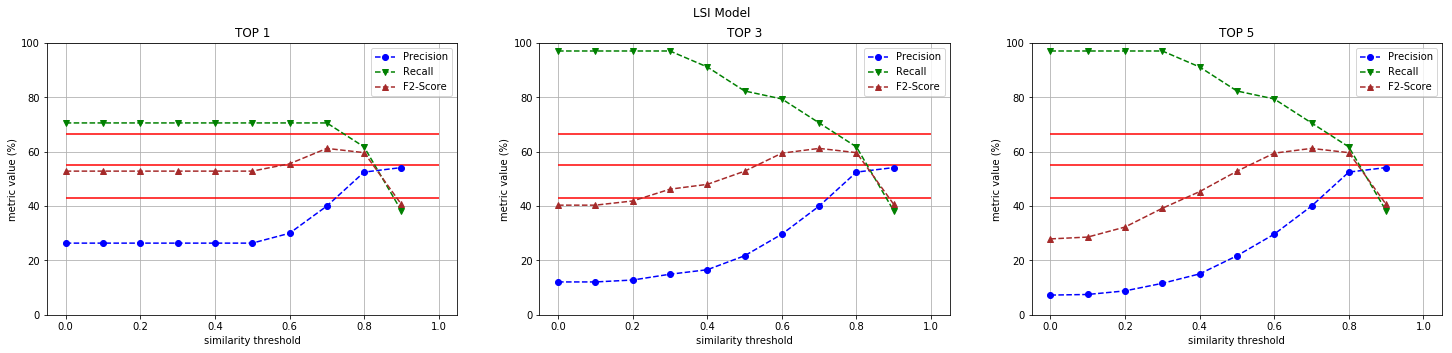

In [9]:
evaluator_2.plot_evaluations_2('LSI Model', evals_df_2, model_name='lsi')

LDA

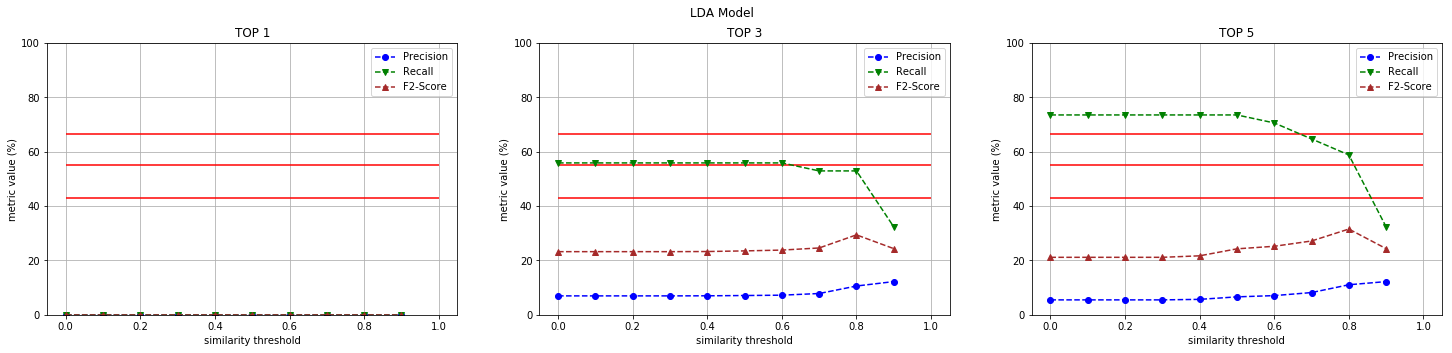

In [10]:
evaluator_2.plot_evaluations_2('LDA Model', evals_df_2, model_name='lda')

BM25

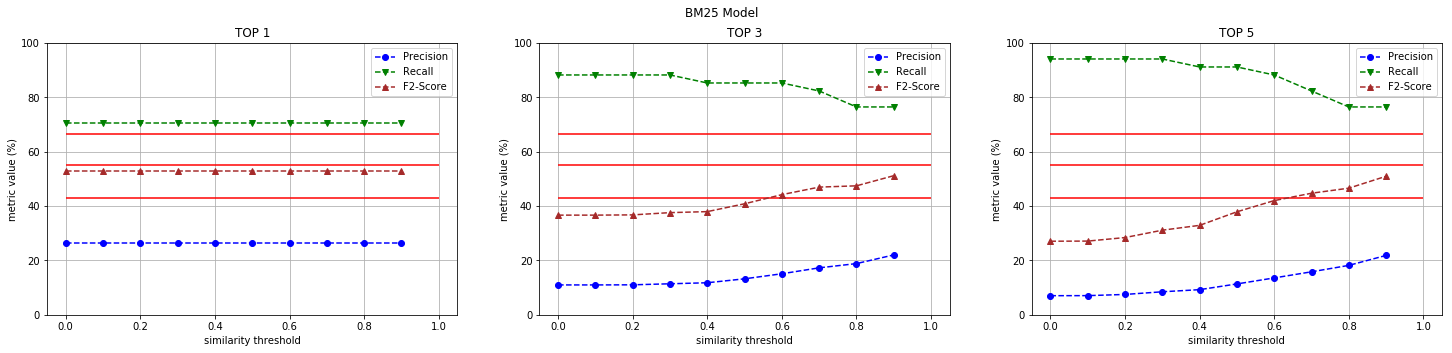

In [11]:
evaluator_2.plot_evaluations_2('BM25 Model', evals_df_2, model_name='bm25')

Word Vector

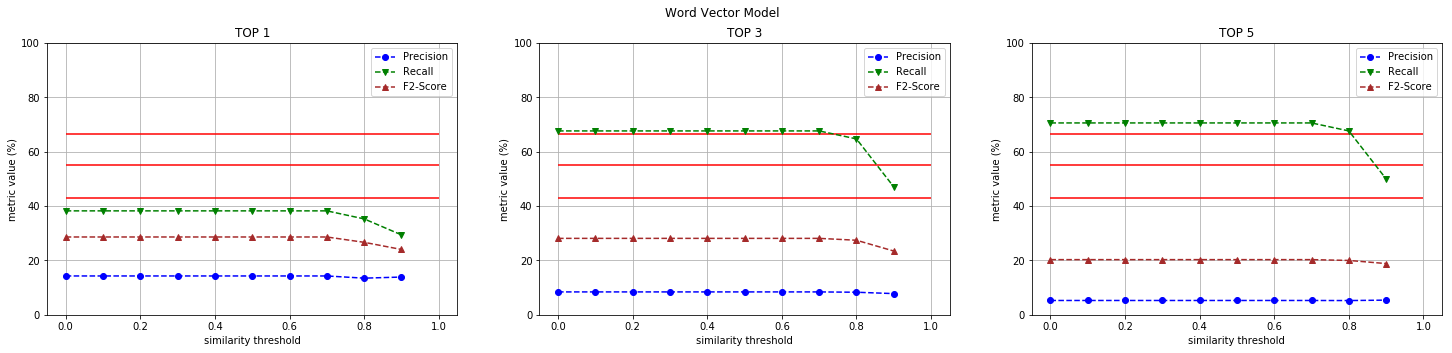

In [12]:
evaluator_2.plot_evaluations_2('Word Vector Model', evals_df_2, model_name='wordvector')

Customized Word Vector

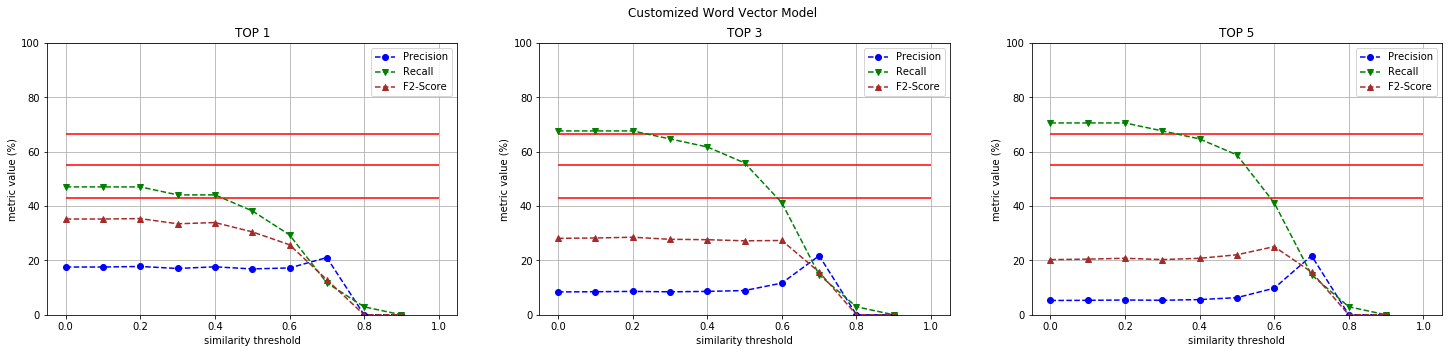

In [13]:
evaluator_2.plot_evaluations_2('Customized Word Vector Model', evals_df_2, model_name='cust_wordvector')

### Approach Example - Assembled Results (Fake)

In [14]:
aux_df = exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix().iloc[:,0:3]
aux_df.index = [x for x in range(19)]
aux_df.index.name = 'tc_id'
aux_functions.highlight_df(aux_df)

In [15]:
aux_df_2 = evals_df_2_1[(evals_df_2_1.model == 'lsi') & (evals_df_2_1.ref_name == 'top_3_cosine_0.0')].trace_links_df.values[0].iloc[:,0:3]
aux_df_2.index = [x for x in range(19)]
aux_df_2.index.name = 'tc_id'
aux_functions.highlight_df(aux_df_2)

### Oracle True Traces

In [16]:
oracle_true_traces_inter = aux_functions.get_oracle_true_positives(exp_vol_intersec_strat_runner)
print('len(oracle_true_traces_inter): {}'.format(len(oracle_true_traces_inter)))

len(oracle_true_traces_inter): 34


#### Oracle

In [17]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_evaluator().get_oracle_df().head())

#### Number of BRs for Feature

In [18]:
import numpy as np
import pandas as pd

df = pd.DataFrame(columns=['feature','num_brs'])
output = exp_vol_intersec_strat_runner.get_evaluator().get_oracle_df().apply(lambda row : np.sum(row), axis=1)
df.feature = output.index
df.num_brs = output.values
df = df[df.num_brs != 0]
df

feature  num_brs
0         new_awesome_bar       20
3   browser_customization        2
4              pdf_viewer        1
5            context_menu        3
13         zoom_indicator        1
14    downloads_dropmaker        4
17  indicator_device_perm        3

### ZeroR Evaluation

In [19]:
df = exp_vol_intersec_strat_runner.get_zeror_model().get_major_counts_df()
df.rename(columns={0:'feature',1:'num_BRs'})

feature  num_BRs
0           new_awesome_bar       20
14      downloads_dropmaker        4
17    indicator_device_perm        3
5              context_menu        3
3     browser_customization        2
4                pdf_viewer        1
13           zoom_indicator        1
11         pointer_lock_api        0
16             flac_support        0
15                   webgl2        0
12                 webm_eme        0
9                webgl_comp        0
10  video_and_canvas_render        0
1        windows_child_mode        0
8                 tts_in_rm        0
7            tts_in_desktop        0
6                  w10_comp        0
2       apz_async_scrolling        0
18            flash_support        0

In [20]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_zeror_model().get_sim_matrix())

### Similarity Matrices Analysis

**LDA**

In [21]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix())

**LSI**

In [22]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix())

**BM25**

In [23]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix())

**Word Vector**

In [24]:
import numpy as np

wv_sim_matrix = exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix()

wv_sim_values = []
for idx,row in wv_sim_matrix.iterrows():
    for col in wv_sim_matrix.columns:
        wv_sim_values.append(wv_sim_matrix.at[idx,col])

print("Mean Similarity Value: {}".format(np.mean(wv_sim_values)))
print("Std Similarity Value: {}".format(np.std(wv_sim_values)))

aux_functions.highlight_df(wv_sim_matrix)

Mean Similarity Value: 0.8616428384184254
Std Similarity Value: 0.05845638042856232


**Customized Word Vector**

In [25]:
import numpy as np

wv_sim_matrix = exp_vol_intersec_strat_runner.get_cust_word2vec_model().get_sim_matrix()

wv_sim_values = []
for idx,row in wv_sim_matrix.iterrows():
    for col in wv_sim_matrix.columns:
        wv_sim_values.append(wv_sim_matrix.at[idx,col])

print("Mean Similarity Value: {}".format(np.mean(wv_sim_values)))
print("Std Similarity Value: {}".format(np.std(wv_sim_values)))

aux_functions.highlight_df(wv_sim_matrix)

Mean Similarity Value: 0.38348478229139515
Std Similarity Value: 0.16787037505250643


### LDA Topics

In [26]:
exp_vol_intersec_strat_runner.get_lda_model().print_topics()

Topic #0: webgl firefox window compat page web open bar tab taskbar
Topic #1: loud speech read html extens text desktop content page use
Topic #2: element stop default http branch set code info forward field
Topic #3: capabl librari render browser firefox http branch element stop default
Topic #4: custom firefox default browser http branch element stop set appear
Topic #5: element stop default http branch set code info forward field
Topic #6: element stop default http branch set code info forward field
Topic #7: menu context option displayport portion apz new zoom pan gecko
Topic #8: download dropmak notif option display http branch element stop default
Topic #9: element stop default http branch set code info forward field
Topic #10: mous lock pointer movement cursor exampl game api rotat click
Topic #11: child certif mode connect account ssl present activ parent doe
Topic #12: indic zoom devic permiss valu need thi user notif default
Topic #13: reader mode firefox shown loud speech re

### Retrieved Traces - Similarity Threshold 0.0

In [27]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_vol_intersec_strat_runner.get_oracle(), 
                                                            evals_df=evals_df_2, 
                                                            top_values=[1,3,5], 
                                                            sim_threshs=[0.0],
                                                            models=MODELS)

retrieved_traces_df[['top','sim_thresh','model',
                     'num_TP','num_FP','num_FN',
                     'precision','recall','fscore']].head(50)

top  sim_thresh            model num_TP num_FP num_FN  precision  recall  \
0    1         0.0              lsi     24     67     10      26.37   70.59   
3    1         0.0              lda      0     91     34       0.00    0.00   
6    1         0.0             bm25     24     67     10      26.37   70.59   
9    1         0.0       wordvector     13     78     21      14.29   38.24   
12   1         0.0  cust_wordvector     16     75     18      17.58   47.06   
1    3         0.0              lsi     33    240      1      12.09   97.06   
4    3         0.0              lda     19    254     15       6.96   55.88   
7    3         0.0             bm25     30    243      4      10.99   88.24   
10   3         0.0       wordvector     23    250     11       8.42   67.65   
13   3         0.0  cust_wordvector     23    250     11       8.42   67.65   
2    5         0.0              lsi     33    422      1       7.25   97.06   
5    5         0.0              lda     25    430      9       5.49   73.53   
8    5         0.0             bm25     32    423      2       7.03   94.12   
11   5         0.0       wordvector     24    431     10       5.27   70.59   
14   5         0.0  cust_wordvector     24    431     10       5.27   70.59   

    fscore  
0    52.86  
3     0.00  
6    52.86  
9    28.63  
12   35.24  
1    40.34  
4    23.23  
7    36.67  
10   28.12  
13   28.12  
2    27.92  
5    21.15  
8    27.07  
11   20.30  
14   20.30

#### Traces Not Captured by Any Technique

In [28]:
import pprint

print('TOP 1 --------------------------')
all_captured_traces_t1_inter = aux_functions.get_captured_traces_union(top_value=1, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t1_inter = oracle_true_traces_inter - all_captured_traces_t1_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t1_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t1_inter), len(oracle_true_traces_inter), len(not_captured_traces_t1_inter)/len(oracle_true_traces_inter)*100))
pprint.pprint(not_captured_traces_t1_inter)

print('\n\nTOP 3 --------------------------')
all_captured_traces_t3_inter = aux_functions.get_captured_traces_union(top_value=3, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t3_inter = oracle_true_traces_inter - all_captured_traces_t3_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t3_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t3_inter), len(oracle_true_traces_inter), len(not_captured_traces_t3_inter)/len(oracle_true_traces_inter)*100))

print('\n\nTOP 5 --------------------------')
all_captured_traces_t5_inter = aux_functions.get_captured_traces_union(top_value=5, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t5_inter = oracle_true_traces_inter - all_captured_traces_t5_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t5_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t5_inter), len(oracle_true_traces_inter), len(not_captured_traces_t5_inter)/len(oracle_true_traces_inter)*100))

TOP 1 --------------------------
len(not_captured_traces): 6
percent not_captured_traces: 6/34 * 100 : 17.65%
{('browser_customization', 1318903),
 ('browser_customization', 1357458),
 ('downloads_dropmaker', 1432915),
 ('new_awesome_bar', 1279143),
 ('new_awesome_bar', 1352539),
 ('pdf_viewer', 1301056)}


TOP 3 --------------------------
len(not_captured_traces): 0
percent not_captured_traces: 0/34 * 100 : 0.0%


TOP 5 --------------------------
len(not_captured_traces): 0
percent not_captured_traces: 0/34 * 100 : 0.0%


In [29]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_oracle().loc[:,[br for tc,br in not_captured_traces_t1_inter]])

In [30]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix().loc[:,[br for tc,br in not_captured_traces_t1_inter]])

In [31]:
aux_functions.detail_features_br(not_captured_traces_t1_inter, features, bugreports)

feat  \
0        new_awesome_bar   
1  browser_customization   
2    downloads_dropmaker   
3  browser_customization   
4        new_awesome_bar   
5             pdf_viewer   

                                                                                                                                                                                                                                                                                                                                                                                                         feat_desc  \
0  The Firefox address bar displays a page's web address (URL). We call it the Awesome Bar because it remembers the pages you’ve visited before and also allows you to search and navigate the web. The more you use it, the better it gets.\n\nJust start typing in the address bar and the autocomplete drop-down will show matching web pages from your browsing history, open tabs, sync'ed web pages, as w...   
1                                                                                                                                                                                                                                                                                                        . Install and Customize Firefox Themes. \n. Customize Firefox Toolbar or restore it to default interface.   
2                                                                                                                                                                                                                                               The download dropmaker displays the amount of downloads being made, the notifications about the downloads and all the contextual options involving the downloads.    
3                                                                                                                                                                                                                                                                                                        . Install and Customize Firefox Themes. \n. Customize Firefox Toolbar or restore it to default interface.   
4  The Firefox address bar displays a page's web address (URL). We call it the Awesome Bar because it remembers the pages you’ve visited before and also allows you to search and navigate the web. The more you use it, the better it gets.\n\nJust start typing in the address bar and the autocomplete drop-down will show matching web pages from your browsing history, open tabs, sync'ed web pages, as w...   
5                                                                                                                                                                                                                                                                                                                                                                     Zoom in, Zoom out, Print and Save PDF Files.   

        br  \
0  1279143   
1  1357458   
2  1432915   
3  1318903   
4  1352539   
5  1301056   

                                                                                                                      br_summary  
0                                            color indicator missing when "File -> New Container Tab" without any windows opened  
1                 After Customization - typed text in the Awesome bar doesn't correspond with the text from One-Off-Searches bar  
2                                Do not write the kMDItemWhereFroms xattr metadata for files downloaded in Private Browsing mode  
3  [Windows 7 and below] Fullscreen window controls not shown with dark themes, close button has broken "red square" hover state  
4                                                                             Move defaultenginename pref setting into list.json  
5                   [e10s] Link with target="_blank"  to download a file leaves a about:blank w

#### Traces Captured by Every Technique

In [32]:
print('TOP 1 -----------------------')
traces_captured_by_all_t1_inter = aux_functions.get_captured_traces_intersec(1, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t1_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t1_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t1_inter)/len(oracle_true_traces_inter) *100))

print('\n\nTOP 3 -----------------------')
traces_captured_by_all_t3_inter = aux_functions.get_captured_traces_intersec(3, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t3_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t3_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t3_inter)/len(oracle_true_traces_inter) *100))

print('\n\nTOP 5 -----------------------')
traces_captured_by_all_t5_inter = aux_functions.get_captured_traces_intersec(5, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t5_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t5_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t5_inter)/len(oracle_true_traces_inter) *100))

TOP 1 -----------------------
len(traces_captured_by_all): 0
percent traces_captured_by_all: 0/34 * 100 : 0.0%


TOP 3 -----------------------
len(traces_captured_by_all): 17
percent traces_captured_by_all: 17/34 * 100 : 50.0%


TOP 5 -----------------------
len(traces_captured_by_all): 23
percent traces_captured_by_all: 23/34 * 100 : 67.65%


#### True Positives Analysis

In [33]:
bm25_tp_set_t1, lsi_tp_set_t1, lda_tp_set_t1, wv_tp_set_t1, cust_wv_tp_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 1, 'TP')
bm25_tp_set_t3, lsi_tp_set_t3, lda_tp_set_t3, wv_tp_set_t3, cust_wv_tp_set_t3 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 3, 'TP')
bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, cust_wv_tp_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 5, 'TP')
#aux_functions.plot_venn_diagrams(TOP, bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, 'True Positives')

In [34]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix())

##### Exclusive Traces

In [36]:
import pandas as pd

print("TOP 1 ------------------------------")
bm25_tp_exc_set_t1, lsi_tp_exc_set_t1, lda_tp_exc_set_t1, wv_tp_exc_set_t1, cust_wv_tp_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_tp_set_t1, 
                                                                                                        lsi_tp_set_t1, 
                                                                                                        lda_tp_set_t1, 
                                                                                                        wv_tp_set_t1,
                                                                                                        cust_wv_tp_set_t1,
                                                                                                        traces_type='TP', 
                                                                                                        verbose=True)

print("\n\nTOP 3 ------------------------------")
bm25_tp_exc_set_t3, lsi_tp_exc_set_t3, lda_tp_exc_set_t3, wv_tp_exc_set_t3, cust_wv_tp_exc_set_t3 =  aux_functions.get_exclusive_traces(bm25_tp_set_t3, 
                                                            lsi_tp_set_t3, 
                                                            lda_tp_set_t3, 
                                                            wv_tp_set_t3, 
                                                            cust_wv_tp_set_t3,
                                                            traces_type='TP', 
                                                            verbose=True)

print("\n\nTOP 5 -------------------------------")
bm25_tp_exc_set_t5, lsi_tp_exc_set_t5, lda_tp_exc_set_t5, wv_tp_exc_set_t5, cust_wv_tp_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_tp_set_t5, 
                                                            lsi_tp_set_t5, 
                                                            lda_tp_set_t5, 
                                                            wv_tp_set_t5, 
                                                            cust_wv_tp_set_t5,
                                                            traces_type='TP', 
                                                            verbose=True)

df = pd.DataFrame(index=['TOP 1', 'TOP 3', 'TOP 5'], columns=['BM25','LSI','LDA','WordVector','Cust_WordVector'])

df.at['TOP 1','BM25'] = len(bm25_tp_exc_set_t1)
df.at['TOP 3','BM25'] = len(bm25_tp_exc_set_t3)
df.at['TOP 5','BM25'] = len(bm25_tp_exc_set_t5)

df.at['TOP 1','LSI'] = len(lsi_tp_exc_set_t1)
df.at['TOP 3','LSI'] = len(lsi_tp_exc_set_t3)
df.at['TOP 5','LSI'] = len(lsi_tp_exc_set_t5)

df.at['TOP 1','LDA'] = len(lda_tp_exc_set_t1)
df.at['TOP 3','LDA'] = len(lda_tp_exc_set_t3)
df.at['TOP 5','LDA'] = len(lda_tp_exc_set_t5)

df.at['TOP 1','WordVector'] = len(wv_tp_exc_set_t1)
df.at['TOP 3','WordVector'] = len(wv_tp_exc_set_t3)
df.at['TOP 5','WordVector'] = len(wv_tp_exc_set_t5)

df.at['TOP 1','Cust_WordVector'] = len(cust_wv_tp_exc_set_t1)
df.at['TOP 3','Cust_WordVector'] = len(cust_wv_tp_exc_set_t3)
df.at['TOP 5','Cust_WordVector'] = len(cust_wv_tp_exc_set_t5)

print()

df

TOP 1 ------------------------------
BM25 Exclusive TP:


{('downloads_dropmaker', 1292573)}



LSI Exclusive TP:


set()



LDA Exclusive TP:


{('new_awesome_bar', 1296366)}



WV Exclusive TP:


set()



Customized WV Exclusive TP:


{('zoom_indicator', 1305195)}

len(bm25_exc_set): 1
len(lsi_exc_set): 0
len(lda_exc_set): 1
len(wv_exc_set): 0


TOP 3 ------------------------------
BM25 Exclusive TP:


{('browser_customization', 1318903),
 ('downloads_dropmaker', 1292573),
 ('pdf_viewer', 1301056)}



LSI Exclusive TP:


set()



LDA Exclusive TP:


{('downloads_dropmaker', 1432915)}



WV Exclusive TP:


set()



Customized WV Exclusive TP:


set()

len(bm25_exc_set): 3
len(lsi_exc_set): 0
len(lda_exc_set): 1
len(wv_exc_set): 0


TOP 5 -------------------------------
BM25 Exclusive TP:


set()



LSI Exclusive TP:


set()



LDA Exclusive TP:


{('downloads_dropmaker', 1432915)}



WV Exclusive TP:


set()



Customized WV Exclusive TP:


set()

len(bm25_exc_set): 0
len(lsi_exc_set): 0
len(lda_exc_set): 1
len(wv_exc_set): 0



BM25 LSI LDA WordVector Cust_WordVector
TOP 1    1   0   1          0               1
TOP 3    3   0   1          0               0
TOP 5    0   0   1          0               0

#### False Positives Analysis

In [37]:
bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1, cust_wv_fp_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 1, 'FP')
bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5, cust_wv_fp_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 5, 'FP')

aux_functions.plot_venn_diagrams(1, bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1, cust_wv_fp_set_t1, 'FP')
print('====================')
aux_functions.plot_venn_diagrams(5, bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5, cust_wv_fp_set_t5, 'FP')

TypeError: plot_venn_diagrams() takes 6 positional arguments but 7 were given

##### Exclusive Traces

In [38]:
print("TOP 1 ------------------------------")
bm25_fp_exc_set_t1, lsi_fp_exc_set_t1, lda_fp_exc_set_t1, wv_fp_exc_set_t1, cust_wv_fp_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1, cust_wv_fp_set_t1, traces_type='FP')

print("\n\nTOP 5 -------------------------------")
bm25_fp_exc_set_t5, lsi_fp_exc_set_t5, lda_fp_exc_set_t5, wv_fp_exc_set_t5, cust_wv_fp_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5, cust_wv_fp_set_t5, traces_type='FP')

TOP 1 ------------------------------
len(bm25_exc_set): 19
len(lsi_exc_set): 85
len(lda_exc_set): 17
len(wv_exc_set): 34


TOP 5 -------------------------------
len(bm25_exc_set): 58
len(lsi_exc_set): 155
len(lda_exc_set): 25
len(wv_exc_set): 73


#### False Negatives Analysis

In [40]:
bm25_fn_set_t1, lsi_fn_set_t1, lda_fn_set_t1, wv_fn_set_t1, cust_wv_fn_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 1, 'FN')
bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5, cust_wv_fn_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 5, 'FN')

aux_functions.plot_venn_diagrams(5, bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5, cust_wv_fn_set_t5, 'False Negatives')

TypeError: plot_venn_diagrams() takes 6 positional arguments but 7 were given

##### Exclusive Traces

In [41]:
print("TOP 1 ------------------------------")
bm25_fn_exc_set_t1, lsi_fn_exc_set_t1, lda_fn_exc_set_t1, wv_fn_exc_set_t1, cust_wv_fn_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_fn_set_t1, lsi_fn_set_t1, lda_fn_set_t1, wv_fn_set_t1, cust_wv_fn_set_t1, traces_type='FN')

print("\n\nTOP 5 -------------------------------")
bm25_fn_exc_set_t5, lsi_fn_exc_set_t5, lda_fn_exc_set_t5, wv_fn_exc_set_t5, cust_wv_fn_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5, cust_wv_fn_set_t5, traces_type='FN')

TOP 1 ------------------------------
len(bm25_exc_set): 0
len(lsi_exc_set): 9
len(lda_exc_set): 0
len(wv_exc_set): 0


TOP 5 -------------------------------
len(bm25_exc_set): 0
len(lsi_exc_set): 0
len(lda_exc_set): 0
len(wv_exc_set): 0


##### **LDA**

In [ ]:
aux_functions.detail_features_br(lda_fn_exc_set_t1, features, bugreports)[['feat','br','br_summary']]

In [ ]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix().loc[:,[b for f,b in lda_fn_exc_set_t1]])

In [ ]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix().loc[:,[b for f,b in lda_fn_exc_set_t1 - set([1270983,1248267,1299458])]])

##### **LSI**

No exclusive False Negative traces for Top 1 and Top 5

##### **BM25**

No exclusive False Negative traces for Top 1 and Top 5

##### **Word Vector**

In [ ]:
aux_functions.detail_features_br(wv_fn_exc_set_t5, features, bugreports)[['feat','br','br_summary']]

In [ ]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix().loc[:,[b for f,b in wv_fn_exc_set_t5]])

### Retrieved Traces - Similarity Threshold 0.9

In [ ]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_vol_intersec_strat_runner.get_oracle(), 
                                                            evals_df=evals_df_2, 
                                                            top_values=[1,3,5], 
                                                            sim_threshs=[0.9],
                                                            models=MODELS)

retrieved_traces_df[['top','sim_thresh','model',
                     'num_TP','num_FP','num_FN',
                     'precision','recall','fscore']].head(50)

#### Traces Not Captured by Any Technique

In [ ]:
import pprint

print('TOP 1 --------------------------')
all_captured_traces_t1_inter = aux_functions.get_captured_traces_union(top_value=1, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t1_inter = oracle_true_traces_inter - all_captured_traces_t1_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t1_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t1_inter), len(oracle_true_traces_inter), len(not_captured_traces_t1_inter)/len(oracle_true_traces_inter)*100))
pprint.pprint(not_captured_traces_t1_inter)

print('\n\nTOP 3 --------------------------')
all_captured_traces_t3_inter = aux_functions.get_captured_traces_union(top_value=3, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t3_inter = oracle_true_traces_inter - all_captured_traces_t3_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t3_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t3_inter), len(oracle_true_traces_inter), len(not_captured_traces_t3_inter)/len(oracle_true_traces_inter)*100))
pprint.pprint(not_captured_traces_t3_inter)

print('\n\nTOP 5 --------------------------')
all_captured_traces_t5_inter = aux_functions.get_captured_traces_union(top_value=5, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t5_inter = oracle_true_traces_inter - all_captured_traces_t5_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t5_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t5_inter), len(oracle_true_traces_inter), len(not_captured_traces_t5_inter)/len(oracle_true_traces_inter)*100))
pprint.pprint(not_captured_traces_t5_inter)

In [ ]:
df = exp_vol_intersec_strat_runner.get_zeror_model().get_major_counts_df()
df.rename(columns={0:'feature',1:'num_BRs'}, inplace=True)
df[df.num_BRs > 0]

In [ ]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix().loc[:,[1292573,1432915]]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix().loc[:,[1292573,1432915]]))

In [ ]:
aux_functions.detail_features_br(not_captured_traces_t1_inter, features, bugreports).sort_values('feat')

In [ ]:
aux_functions.detail_features_br(not_captured_traces_t3_inter, features, bugreports).sort_values('feat')

In [ ]:
aux_functions.detail_features_br(not_captured_traces_t5_inter, features, bugreports).sort_values('feat')

#### Traces Captured by Every Technique

In [ ]:
import pprint

print('TOP 1 -----------------------')
traces_captured_by_all_t1_inter = aux_functions.get_captured_traces_intersec(1, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t1_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t1_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t1_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t1_inter)

print('\n\nTOP 3 -----------------------')
traces_captured_by_all_t3_inter = aux_functions.get_captured_traces_intersec(3, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t3_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t3_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t3_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t3_inter)

print('\n\nTOP 5 -----------------------')
traces_captured_by_all_t5_inter = aux_functions.get_captured_traces_intersec(5, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t5_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t5_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t5_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t5_inter)

#### True Positives Analysis

In [ ]:
bm25_tp_set_t1, lsi_tp_set_t1, lda_tp_set_t1, wv_tp_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 1, 'TP')
bm25_tp_set_t3, lsi_tp_set_t3, lda_tp_set_t3, wv_tp_set_t3 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 3, 'TP')
bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 5, 'TP')
#aux_functions.plot_venn_diagrams(TOP, bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, 'True Positives')

##### Exclusive Traces

In [ ]:
import pandas as pd

print("TOP 1 ------------------------------")
bm25_tp_exc_set_t1, lsi_tp_exc_set_t1, lda_tp_exc_set_t1, wv_tp_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_tp_set_t1, lsi_tp_set_t1, lda_tp_set_t1, wv_tp_set_t1, traces_type='TP', verbose=True)

print("\n\nTOP 3 ------------------------------")
bm25_tp_exc_set_t3, lsi_tp_exc_set_t3, lda_tp_exc_set_t3, wv_tp_exc_set_t3 =  aux_functions.get_exclusive_traces(bm25_tp_set_t3, lsi_tp_set_t3, lda_tp_set_t3, wv_tp_set_t3, traces_type='TP', verbose=True)

print("\n\nTOP 5 -------------------------------")
bm25_tp_exc_set_t5, lsi_tp_exc_set_t5, lda_tp_exc_set_t5, wv_tp_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, traces_type='TP', verbose=True)

df = pd.DataFrame(index=['TOP 1', 'TOP 3', 'TOP 5'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 1','BM25'] = len(bm25_tp_exc_set_t1)
df.at['TOP 3','BM25'] = len(bm25_tp_exc_set_t3)
df.at['TOP 5','BM25'] = len(bm25_tp_exc_set_t5)

df.at['TOP 1','LSI'] = len(lsi_tp_exc_set_t1)
df.at['TOP 3','LSI'] = len(lsi_tp_exc_set_t3)
df.at['TOP 5','LSI'] = len(lsi_tp_exc_set_t5)

df.at['TOP 1','LDA'] = len(lda_tp_exc_set_t1)
df.at['TOP 3','LDA'] = len(lda_tp_exc_set_t3)
df.at['TOP 5','LDA'] = len(lda_tp_exc_set_t5)

df.at['TOP 1','WordVector'] = len(wv_tp_exc_set_t1)
df.at['TOP 3','WordVector'] = len(wv_tp_exc_set_t3)
df.at['TOP 5','WordVector'] = len(wv_tp_exc_set_t5)

print()

df

**BM25 Missed Traces**

In [ ]:
brs = aux_functions.detail_features_br(set(oracle_true_traces_inter)-set(bm25_tp_set_t5), features, bugreports).br
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_oracle().loc[:,brs]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix().loc[:,brs]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix().loc[:,brs]))

##### Details of Exclusive Traces

In [ ]:
display(aux_functions.detail_features_br(bm25_tp_exc_set_t1, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(bm25_tp_exc_set_t3, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(wv_tp_exc_set_t3, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(wv_tp_exc_set_t5, features, bugreports)[['feat','br','br_summary']])

**LSI vs BM25 Similarity Matrices Comparison - TOP 1**

In [ ]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix().loc[:,[b for f,b in bm25_tp_exc_set_t1]]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix().loc[:,[b for f,b in bm25_tp_exc_set_t1]]))

**LSI vs BM25 Similarity Matrices Comparison - TOP 3 and 5**

In [ ]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix().loc[:,[b for f,b in bm25_tp_exc_set_t3]]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix().loc[:,[b for f,b in bm25_tp_exc_set_t3]]))

**BM25 vs WV Similarity Matrices Comparison - TOP 3**

In [ ]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix().loc[:,[b for f,b in wv_tp_exc_set_t5]]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix().loc[:,[b for f,b in wv_tp_exc_set_t5]]))

#### False Positives Analysis

In [ ]:
bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 1, 'FP')
bm25_fp_set_t3, lsi_fp_set_t3, lda_fp_set_t3, wv_fp_set_t3 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 3, 'FP')
bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 5, 'FP')

#aux_functions.plot_venn_diagrams(1, bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1, 'FP')
#print('====================')
#aux_functions.plot_venn_diagrams(3, bm25_fp_set_t3, lsi_fp_set_t3, lda_fp_set_t3, wv_fp_set_t3, 'FP')
#print('====================')
#aux_functions.plot_venn_diagrams(5, bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5, 'FP')

##### Exclusive Traces

In [ ]:
print("TOP 1 ------------------------------")
bm25_fp_exc_set_t1, lsi_fp_exc_set_t1, lda_fp_exc_set_t1, wv_fp_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1, traces_type='FP')

print("\n\nTOP 3 ------------------------------")
bm25_fp_exc_set_t3, lsi_fp_exc_set_t3, lda_fp_exc_set_t3, wv_fp_exc_set_t3 =  aux_functions.get_exclusive_traces(bm25_fp_set_t3, lsi_fp_set_t3, lda_fp_set_t3, wv_fp_set_t3, traces_type='FP')

print("\n\nTOP 5 -------------------------------")
bm25_fp_exc_set_t5, lsi_fp_exc_set_t5, lda_fp_exc_set_t5, wv_fp_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5, traces_type='FP')

**False Positives Analysis**

In [ ]:
df_bm25_t1 = aux_functions.detail_features_br(bm25_fp_exc_set_t1, features, bugreports)
df_bm25_t5 = aux_functions.detail_features_br(bm25_fp_exc_set_t5, features, bugreports)

bm25_t1_fp_amount_by_feat = df_bm25_t1.groupby('feat').count()
bm25_t5_fp_amount_by_feat = df_bm25_t5.groupby('feat').count()
bm25_t1_fp_amount_by_feat['model'] = 'bm25'
bm25_t5_fp_amount_by_feat['model'] = 'bm25'


df_lda_t1 = aux_functions.detail_features_br(lda_fp_exc_set_t1, features, bugreports)
df_lda_t5 = aux_functions.detail_features_br(lda_fp_exc_set_t5, features, bugreports)

lda_t1_fp_amount_by_feat = df_lda_t1.groupby('feat').count()
lda_t5_fp_amount_by_feat = df_lda_t5.groupby('feat').count()
lda_t1_fp_amount_by_feat['model'] = 'lda'
lda_t5_fp_amount_by_feat['model'] = 'lda'


df_lsi_t1 = aux_functions.detail_features_br(lsi_fp_exc_set_t1, features, bugreports)
df_lsi_t5 = aux_functions.detail_features_br(lsi_fp_exc_set_t5, features, bugreports)

lsi_t1_fp_amount_by_feat = df_lsi_t1.groupby('feat').count()
lsi_t5_fp_amount_by_feat = df_lsi_t5.groupby('feat').count()
lsi_t1_fp_amount_by_feat['model'] = 'lsi'
lsi_t5_fp_amount_by_feat['model'] = 'lsi'


df_wv_t1 = aux_functions.detail_features_br(wv_fp_exc_set_t1, features, bugreports)
df_wv_t5 = aux_functions.detail_features_br(wv_fp_exc_set_t5, features, bugreports)

wv_t1_fp_amount_by_feat = df_wv_t1.groupby('feat').count()
wv_t5_fp_amount_by_feat = df_wv_t5.groupby('feat').count()
wv_t1_fp_amount_by_feat['model'] = 'wordvector'
wv_t5_fp_amount_by_feat['model'] = 'wordvector'

###### TOP 10

In [ ]:
df_t1 = pd.concat([bm25_t1_fp_amount_by_feat,  lsi_t1_fp_amount_by_feat,
                    lda_t1_fp_amount_by_feat,   wv_t1_fp_amount_by_feat])

df_t1 = df_t1[['feat_desc','model']]
df_t1.reset_index(inplace=True)
df_t1.rename(columns={'feat_desc':'FP_amount','feat':'feature'}, inplace=True)
df_t1 = df_t1.pivot('feature','model','FP_amount')
#df_t1.head(20)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=df_t1, linewidths=.3, annot=True, cmap='GnBu')

###### TOP 40

In [ ]:
df_t5 = pd.concat([bm25_t5_fp_amount_by_feat, lsi_t5_fp_amount_by_feat,
                     lda_t5_fp_amount_by_feat,  wv_t5_fp_amount_by_feat])

df_t5 = df_t5[['feat_desc','model']]
df_t5.reset_index(inplace=True)
df_t5.rename(columns={'feat_desc':'FP_amount','feat':'feature'}, inplace=True)
df_t5 = df_t5.pivot('feature','model','FP_amount')
#df_t5.head(20)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(ax=ax, data=df_t5, linewidths=.3, annot=True, cmap='GnBu')

#### False Negatives Analysis

In [ ]:
bm25_fn_set_t1, lsi_fn_set_t1, lda_fn_set_t1, wv_fn_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 1, 'FN')
bm25_fn_set_t3, lsi_fn_set_t3, lda_fn_set_t3, wv_fn_set_t3 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 3, 'FN')
bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, MODELS, 5, 'FN')

print("TOP 1 -----------------------------------")
aux_functions.plot_venn_diagrams(1, bm25_fn_set_t1, lsi_fn_set_t1, lda_fn_set_t1, wv_fn_set_t1, 'FN')

print("\n\nTOP 5 -----------------------------------")
aux_functions.plot_venn_diagrams(5, bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5, 'FN')

##### Exclusive Traces

In [ ]:
print("TOP 1 ------------------------------")
bm25_fn_exc_set_t1, lsi_fn_exc_set_t1, lda_fn_exc_set_t1, wv_fn_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_fn_set_t1, lsi_fn_set_t1, lda_fn_set_t1, wv_fn_set_t1, traces_type='FN', verbose=True)

print("\n\nTOP 3 -------------------------------")
bm25_fn_exc_set_t3, lsi_fn_exc_set_t3, lda_fn_exc_set_t3, wv_fn_exc_set_t3 =  aux_functions.get_exclusive_traces(bm25_fn_set_t3, lsi_fn_set_t3, lda_fn_set_t3, wv_fn_set_t3, traces_type='FN', verbose=True)

print("\n\nTOP 5 -------------------------------")
bm25_fn_exc_set_t5, lsi_fn_exc_set_t5, lda_fn_exc_set_t5, wv_fn_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5, traces_type='FN', verbose=True)

##### Detail False Negatives

In [ ]:
display(aux_functions.detail_features_br(lda_fn_exc_set_t1, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(lda_fn_exc_set_t5, features, bugreports)[['feat','br','br_summary']])

In [ ]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix().loc[:,[b for f,b in lda_fn_exc_set_t1]]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix().loc[:,[b for f,b in lda_fn_exc_set_t5]]))

##### Word Vector FN Details

In [ ]:
display(aux_functions.detail_features_br(wv_fn_exc_set_t3, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(wv_fn_exc_set_t5, features, bugreports)[['feat','br','br_summary']])

In [ ]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix().loc[:,[b for f,b in wv_fn_exc_set_t3]]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix().loc[:,[b for f,b in wv_fn_exc_set_t5]]))

##### LSI FN Details

In [ ]:
display(aux_functions.detail_features_br(lsi_fn_exc_set_t3, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(lsi_fn_exc_set_t5, features, bugreports)[['feat','br','br_summary']])

In [ ]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix().loc[:,[b for f,b in lsi_fn_exc_set_t3]]))

In [ ]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_oracle().loc[:,[1353831]])

### Recovery Effort Index (REI)

In [ ]:
orc_vol_only_precision = 36.56
def calculate_rei(row):
    if row['precision'] > 0:
        return orc_vol_only_precision/row['precision']
    return 0

In [ ]:
retrieved_traces_df['rei'] = retrieved_traces_df.apply(lambda row : calculate_rei(row), axis=1)
retrieved_traces_df[['top','model','precision','recall','rei']].groupby('model').rei.mean()

### Goodness Scale

In [ ]:
aux_functions.calculate_goodness(evals_df_2_1)

### Delete Variables

## Volunteers Only Strategy

In [ ]:
vol_strat_runner = feat_br_strat_runner.Feat_BR_Vol_Strat_Runner()
vol_strat_runner.execute()

evaluator_4 = vol_strat_runner.get_evaluator() 
evals_df_4 = vol_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_4.head()

In [ ]:
evals_df_4_1 = evals_df_4[evals_df_4.top != 19.0]
aux_functions.highlight_df( evals_df_4_1[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

In [ ]:
evaluator_4.plot_evaluations_3(evals_df_4_1, title='BR-Feat Traceability Recovery - Volunteers-Only Strategy')

In [ ]:
evaluator_4.plot_evaluations_4(evals_df_4_1)

In [ ]:
evaluator_4.plot_evaluations_5(evals_df_4_1)

### Retrieved Traces - Similarity Threshold 0.0

In [ ]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=vol_strat_runner.get_oracle(), evals_df = evals_df_4)
retrieved_traces_df.head(50)

### Oracle True Traces

In [ ]:
oracle_true_traces_vol = aux_functions.get_oracle_true_positives(vol_strat_runner)
print('len(oracle_true_traces): {}'.format(len(oracle_true_traces_vol)))

### Traces Not Captured by Any Technique

In [ ]:
print('TOP 1 --------------------------')
all_captured_traces_t1_vol = aux_functions.get_captured_traces_union(top_value=1, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t1_vol = oracle_true_traces_vol - all_captured_traces_t1_vol
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t1_vol)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t1_vol), len(oracle_true_traces_vol), len(not_captured_traces_t1_vol)/len(oracle_true_traces_vol)*100))

print('\n\nTOP 3 --------------------------')
all_captured_traces_t3_vol = aux_functions.get_captured_traces_union(top_value=3, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t3_vol = oracle_true_traces_vol - all_captured_traces_t3_vol
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t3_vol)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t3_vol), len(oracle_true_traces_vol), len(not_captured_traces_t3_vol)/len(oracle_true_traces_vol)*100))

print('\n\nTOP 5 --------------------------')
all_captured_traces_t5_vol = aux_functions.get_captured_traces_union(top_value=5, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t5_vol = oracle_true_traces_vol - all_captured_traces_t5_vol
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t5_vol)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t5_vol), len(oracle_true_traces_vol), len(not_captured_traces_t5_vol)/len(oracle_true_traces_vol)*100))

#### Details of not captured traces

In [ ]:
aux_functions.detail_features_br(not_captured_traces, features=features, bugreports=bugreports)

### Traces Captured by Every Technique

In [ ]:
print('TOP 1 -----------------------')
traces_captured_by_all_t1_vol = aux_functions.get_captured_traces_intersec(1, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t1_vol)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t1_vol), len(oracle_true_traces_vol), len(traces_captured_by_all_t1_vol)/len(oracle_true_traces_vol) *100))

print('\n\nTOP 3 -----------------------')
traces_captured_by_all_t3_vol = aux_functions.get_captured_traces_intersec(3, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t3_vol)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t3_vol), len(oracle_true_traces_vol), len(traces_captured_by_all_t3_vol)/len(oracle_true_traces_vol) *100))

print('\n\nTOP 5 -----------------------')
traces_captured_by_all_t5_vol = aux_functions.get_captured_traces_intersec(5, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t5_vol)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t5_vol), len(oracle_true_traces_vol), len(traces_captured_by_all_t5_vol)/len(oracle_true_traces_vol) *100))

### REI Calculation

In [ ]:
evals_df_4_2 = evals_df_4[(evals_df_4.top == 19.0) & (evals_df_4.sim_threshold == 0.0)]
evals_df_4_2.head()

In [ ]:
volunteers_perc_precision = 36.56
lsi_rei = volunteers_perc_precision / evals_df_4_2[evals_df_4_2.model == 'lsi'].iloc[0,:].perc_precision
lda_rei = volunteers_perc_precision / evals_df_4_2[evals_df_4_2.model == 'lda'].iloc[0,:].perc_precision 
bm25_rei= volunteers_perc_precision / evals_df_4_2[evals_df_4_2.model == 'bm25'].iloc[0,:].perc_precision 
wv_rei =  volunteers_perc_precision / evals_df_4_2[evals_df_4_2.model == 'wordvector'].iloc[0,:].perc_precision

print('LSI REI: {:2.4}%'.format(lsi_rei))
print('LDA REI: {:2.4}%'.format(lda_rei))
print('BM25 REI: {:2.4}%'.format(bm25_rei))
print('WV REI: {:2.4}%'.format(wv_rei))

### Delete Variables

## Union Strategy

In [ ]:
exp_vol_union_strat_runner = feat_br_strat_runner.Feat_BR_Exp_Vol_Union_Strat_Runner()
exp_vol_union_strat_runner.execute()

evaluator_1 = exp_vol_union_strat_runner.get_evaluator() 
evals_df_1 = exp_vol_union_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_1.head()

### Plots

In [ ]:
evaluator_1.plot_evaluations_3(evals_df_1, title='BR-Feat Traceability Recovery - Exp-Vol Union Strategy')

In [ ]:
evaluator_1.plot_evaluations_4(evals_df_1)

In [ ]:
evaluator_1.plot_evaluations_5(evals_df_1)

### Delete Variables

## Expert Only Strategy

In [ ]:
exp_strat_runner = feat_br_strat_runner.Feat_BR_Exp_Strat_Runner()
exp_strat_runner.execute()

evaluator_3 = exp_strat_runner.get_evaluator() 
evals_df_3 = exp_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_3.head()

In [ ]:
evals_df_3_1 = evals_df_3[evals_df_3.top != 19.0]
aux_functions.highlight_df( evals_df_3_1[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

In [ ]:
evaluator_3.plot_evaluations_3(evals_df_3_1, title='BR-Feat Traceability Recovery - Expert-Only Strategy')

In [ ]:
evaluator_3.plot_evaluations_4(evals_df_3_1)

In [ ]:
evaluator_3.plot_evaluations_5(evals_df_3_1)

### Retrieved Traces - Similarity Threshold 0.0

In [ ]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_strat_runner.get_oracle(), evals_df = evals_df_3)
retrieved_traces_df.head(50)

### Oracle True Traces

In [ ]:
oracle_true_traces = aux_functions.get_oracle_true_positives(exp_strat_runner)
print('len(oracle_true_traces): {}'.format(len(oracle_true_traces)))

### Traces Not Captured by Any Technique

In [ ]:
print('TOP 1 --------------------------')
all_captured_traces = aux_functions.get_captured_traces_union(top_value=1, retrieved_traces_df=retrieved_traces_df)
not_captured_traces = oracle_true_traces - all_captured_traces
print('len(not_captured_traces): {}'.format(len(not_captured_traces)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces), len(oracle_true_traces), len(not_captured_traces)/len(oracle_true_traces)*100))

print('\n\nTOP 3 --------------------------')
all_captured_traces = aux_functions.get_captured_traces_union(top_value=3, retrieved_traces_df=retrieved_traces_df)
not_captured_traces = oracle_true_traces - all_captured_traces
print('len(not_captured_traces): {}'.format(len(not_captured_traces)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces), len(oracle_true_traces), len(not_captured_traces)/len(oracle_true_traces)*100))

print('\n\nTOP 5 --------------------------')
#from modules.utils import firefox_dataset_p2 as fd
all_captured_traces = aux_functions.get_captured_traces_union(top_value=5, retrieved_traces_df=retrieved_traces_df)
not_captured_traces = oracle_true_traces - all_captured_traces
#aux_functions.detail_features_br(not_captured_traces, features=fd.Datasets.read_features_df(), bugreports=fd.Datasets.read_selected_bugreports_df())
print('len(not_captured_traces): {}'.format(len(not_captured_traces)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces), len(oracle_true_traces), len(not_captured_traces)/len(oracle_true_traces)*100))

### Traces Captured by Every Technique

In [ ]:
print('TOP 1 -----------------------')
traces_captured_by_all = aux_functions.get_captured_traces_intersec(1, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all), len(oracle_true_traces), len(traces_captured_by_all)/len(oracle_true_traces) *100))

print('\n\nTOP 3 -----------------------')
traces_captured_by_all = aux_functions.get_captured_traces_intersec(3, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all), len(oracle_true_traces), len(traces_captured_by_all)/len(oracle_true_traces) *100))

print('\n\nTOP 5 -----------------------')
traces_captured_by_all = aux_functions.get_captured_traces_intersec(5, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all), len(oracle_true_traces), len(traces_captured_by_all)/len(oracle_true_traces) *100))

### Delete Variables